In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2026_per_game.html'
tables = pd.read_html(url)

df = tables[0]
print (df)

        Rk                   Player   Age Team  Pos     G    GS    MP    FG  \
0      1.0              Luka Dončić  26.0  LAL   PG  13.0  13.0  37.2  10.8   
1      2.0  Shai Gilgeous-Alexander  27.0  OKC   PG  19.0  19.0  33.3  10.9   
2      3.0             Tyrese Maxey  25.0  PHI   PG  17.0  17.0  39.9  10.8   
3      4.0    Giannis Antetokounmpo  31.0  MIL   PF  13.0  13.0  31.8  12.0   
4      5.0         Donovan Mitchell  29.0  CLE   SG  17.0  17.0  34.0  10.2   
..     ...                      ...   ...  ...  ...   ...   ...   ...   ...   
480  479.0         Christian Koloko  25.0  LAL    C   2.0   0.0   3.0   0.0   
481  480.0              Chris Mañon  24.0  LAL   SG   2.0   0.0   3.5   0.0   
482  481.0         Garrison Mathews  29.0  IND   SG   3.0   0.0   5.3   0.0   
483  482.0         Kenrich Williams  31.0  OKC   PF   1.0   0.0  13.0   0.0   
484    NaN           League Average   NaN  NaN  NaN   NaN   NaN   NaN   NaN   

      FGA  ...  ORB  DRB   TRB  AST  STL  BLK  TOV 

In [3]:
df = df[['Player', 'Pos', 'Team', 'Age', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
          '3PA', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]

In [4]:
# Drop partial rows for players traded mid-season
sorted_df = df.sort_values("Team")
df = sorted_df.drop_duplicates(subset="Player", keep='first')
df.reset_index(drop=True, inplace=True)

In [5]:
# TODO: Choose filtering method to have a smaller pool of relevant players
# Drop all players with less than 18 minutes played
df.drop(df[df['MP'] <= 15.0].index, inplace = True)

C:\Users\zivaz\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Descriptive Analysis

In [6]:
des = df.describe()

In [7]:
# Add Coeffiecint of Variance as CV
# Intuition - lower values can indicate average players in category provide more competetive statistics
des.loc['CV'] = des.loc["std"] / des.loc["mean"]
des

,Age,G,MP,FG,FGA,FG%,3P,3PA,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PTS
count,299.000000,299.000000,299.000000,299.000000,299.000000,300.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,26.408027,14.926421,26.013043,4.692308,9.933779,0.473760,1.465886,4.060535,2.320067,2.921070,0.777033,4.727425,2.982943,0.922408,0.516722,1.621739,13.167893
std,4.171741,4.151648,6.013056,2.217814,4.454207,0.080356,0.920847,2.362099,1.877060,2.243976,0.118556,2.415050,1.964793,0.417968,0.470029,0.860367,6.509794
min,19.000000,1.000000,15.100000,1.000000,2.600000,0.306000,0.000000,0.000000,0.000000,0.000000,0.222000,0.700000,0.000000,0.000000,0.000000,0.200000,3.300000
25%,23.000000,13.000000,21.400000,3.000000,6.400000,0.421500,0.800000,2.500000,0.950000,1.300000,0.714000,2.900000,1.600000,0.600000,0.200000,1.000000,8.150000
50%,26.000000,16.000000,26.100000,4.300000,9.000000,0.468000,1.400000,3.900000,1.600000,2.200000,0.789000,4.300000,2.400000,0.800000,0.400000,1.400000,11.800000
75%,29.000000,18.000000,30.950000,6.200000,13.250000,0.505250,2.000000,5.500000,3.200000,3.750000,0.853000,5.900000,3.700000,1.100000,0.700000,2.200000,17.100000
max,41.000000,20.000000,39.900000,12.000000,23.100000,0.802000,4.700000,12.000000,9.800000,12.400000,1.000000,12.900000,11.100000,2.400000,3.600000,4.200000,35.200000
CV,0.157972,0.278141,0.231155,0.472649,0.448390,0.169613,0.628185,0.581721,0.809054,0.768203,0.152575,0.510860,0.658676,0.453127,0.909636,0.530521,0.494369


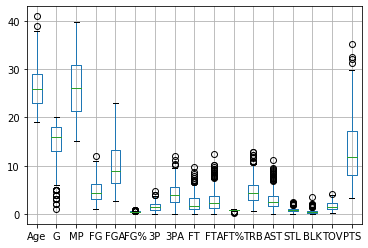

In [8]:
# IQR analysis
ax, lines = df.boxplot(return_type='both')

In [9]:
# Number of ourliers for each category
for i, col in enumerate(df.columns[3:]):
  print(f"Outliers in {col}: {len(lines['fliers'][i].get_data()[1])}")

Outliers in Age: 2
Outliers in G: 16
Outliers in MP: 0
Outliers in FG: 1
Outliers in FGA: 0
Outliers in FG%: 17
Outliers in 3P: 4
Outliers in 3PA: 4
Outliers in FT: 13
Outliers in FTA: 17
Outliers in FT%: 8
Outliers in TRB: 11
Outliers in AST: 18
Outliers in STL: 7
Outliers in BLK: 17
Outliers in TOV: 1
Outliers in PTS: 4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF59899E50>,
      dtype=object)

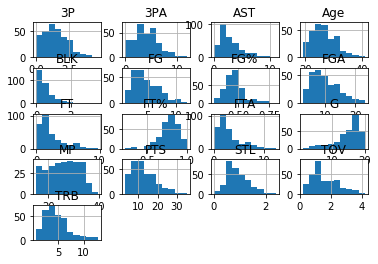

In [10]:
df.hist()

Look at REB, STL and BLK. The distributions are long-tail and the top players are quite rare and distant from average and median players because of the density at low values.

As for PTS and STL, there is more density (players) around the middle of the range and closer to the elite players (we have a shorter tail).

It reflects the CV numbers well and helps in uderstanding categories in which good players are more scarce.

In [11]:
# if not, proceed with normalization

In [12]:
# if yes, try RobustScaler

In [13]:
# try min-max scaling anyway

### Data Transformation and Modeling

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
df_score = df[['FG%', 'FT%', '3P', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]
df_attempts = df[['FGA', 'FTA']]

scaler = StandardScaler()
mm_scaler = MinMaxScaler()

scaled = scaler.fit_transform(df_score)
att_scaled = mm_scaler.fit_transform(df_attempts)

# Put back into DataFrame
scaled_df = pd.DataFrame(scaled, columns=df_score.columns, index=df_score.index)
att_scaled_df = pd.DataFrame(att_scaled, columns=df_attempts.columns, index=df_attempts.index)

# Combine back with string columns
scaled_score_df = pd.concat([df[['Player', 'Pos', 'Team']], att_scaled_df ,scaled_df], axis=1)

In [16]:
scaled_score_df["TOV"] *= -1

In [17]:
scaled_score_df["FG%"] = scaled_score_df["FGA"] * scaled_score_df["FG%"]
scaled_score_df["FT%"] = scaled_score_df["FTA"] * scaled_score_df["FT%"]
scaled_score_df.drop(['FGA','FTA'], axis=1, inplace=True)

In [18]:
# Rescaling the percentage categoreies
perc_df = scaled_score_df[['FG%', 'FT%']]
perc_scaled = scaler.fit_transform(perc_df)
perc_scaled_df = pd.DataFrame(perc_scaled, columns=perc_df.columns, index=perc_df.index)
scaled_score_df[['FG%', 'FT%']] = perc_scaled_df

In [19]:
scaled_score_df.describe()

,FG%,FT%,3P,TRB,AST,STL,BLK,TOV,PTS
count,2.990000e+02,2.980000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,1.782298e-17,1.471604e-17,-9.542720e-17,5.643943e-17,-2.064495e-16,-1.930823e-17,5.903862e-17,-2.710578e-17,-3.074464e-16
std,1.001676e+00,1.001682e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-3.087476e+00,-4.423180e+00,-1.594557e+00,-1.670432e+00,-1.520742e+00,-2.210585e+00,-1.101184e+00,-3.001724e+00,-1.518395e+00
25%,-4.726801e-01,-4.424140e-01,-7.243357e-01,-7.579505e-01,-7.050419e-01,-7.726626e-01,-6.749652e-01,-6.732367e-01,-7.721143e-01
50%,-5.637409e-02,-8.259091e-02,-7.166958e-02,-1.772805e-01,-2.971918e-01,-2.933553e-01,-2.487464e-01,2.581584e-01,-2.104807e-01
75%,4.023694e-01,4.261577e-01,5.809965e-01,4.863423e-01,3.655646e-01,4.256057e-01,3.905818e-01,7.238560e-01,6.050420e-01
max,5.122872e+00,3.298756e+00,3.517994e+00,3.389692e+00,4.138178e+00,3.541103e+00,6.570754e+00,1.655251e+00,3.390129e+00


In [20]:
df_basic_rank = scaled_score_df
df_basic_rank["Val"] = df_basic_rank.select_dtypes(include=["number"]).sum(axis=1)
df_basic_rank.sort_values(by='Val', ascending=False, inplace=True)
df_basic_rank.reset_index(drop=True, inplace=True)

In [21]:
df_basic_rank

,Player,Pos,Team,FG%,FT%,3P,TRB,AST,STL,BLK,TOV,PTS,Val
0,Nikola Jokić,C,DEN,4.480269,1.378513,0.689774,3.348216,4.138178,1.623874,0.603691,-2.186754,2.528445,16.604206
1,Shai Gilgeous-Alexander,PG,OKC,2.586265,3.298756,0.798552,0.071578,1.844021,1.623874,0.603691,-0.091115,2.990061,13.725684
2,Victor Wembanyama,C,SAS,0.921502,1.506687,0.254663,3.389692,0.518508,0.425606,6.570754,-2.303178,2.005279,13.289513
3,Tyler Herro,SG,MIA,4.514448,2.492176,0.037108,0.527819,0.263602,2.582489,-0.035637,0.723856,2.051441,13.157301
4,Tyrese Maxey,PG,PHI,-0.116334,2.152630,2.647773,-0.135804,2.302853,1.623874,0.603691,-1.255359,2.928512,10.751836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Sidy Cissoko,SF,POR,-0.137110,-0.765781,-0.941891,-1.131238,-0.807004,-0.772663,-1.101184,0.840280,-1.364522,-6.181113
296,Jordan Hawkins,SG,NOP,-0.833960,-0.229207,-0.615558,-1.214191,-1.010929,-1.731277,-0.888075,1.422402,-1.241425,-6.342220
297,Bradley Beal,SG,LAC,-1.023985,-0.258674,-0.289225,-1.628955,-0.654061,-1.012316,-1.101184,0.141734,-0.764421,-6.591087
298,Jalen Wilson,PF,BRK,-0.357047,-0.127780,-0.289225,-1.546003,-1.214855,-1.970931,-1.101184,1.073129,-1.195263,-6.729157


In [22]:
def highlight_group_boundaries(row):
    # row.name gives the row index
    if (row.name + 1) % 8 == 0:  # every 8th row
        return ["border-bottom: 3px solid black"] * len(row)
    else:
        return [""] * len(row)

In [23]:
df_basic_rank[["Player","Val"]][:170].style.apply(highlight_group_boundaries, axis=1)

,Player,Val
0,Nikola Jokić,16.604206
1,Shai Gilgeous-Alexander,13.725684
2,Victor Wembanyama,13.289513
3,Tyler Herro,13.157301
4,Tyrese Maxey,10.751836
5,Luka Dončić,10.152622
6,Kawhi Leonard,8.740531
7,James Harden,8.062180
8,Mikal Bridges,7.852515
9,Donovan Mitchell,7.585225


In [24]:
normalized_vals = (df_basic_rank["Val"] - df_basic_rank["Val"].mean())/df_basic_rank["Val"].std()

In [25]:
normalized_vals[(normalized_vals < 0.1) & (normalized_vals > -0.1)]

117    9.841819e-02
118    9.300848e-02
119    8.891612e-02
120    8.511590e-02
121    8.297883e-02
122    6.138787e-02
123    3.350042e-02
124    3.120222e-02
125    2.853820e-02
126    2.610079e-02
127    1.584173e-02
128    7.351994e-03
129    6.392850e-03
130    2.101168e-03
131    3.493964e-16
132   -1.010266e-02
133   -1.072700e-02
134   -1.078772e-02
135   -2.247099e-02
136   -4.848912e-02
137   -7.196469e-02
138   -7.650541e-02
139   -8.046108e-02
140   -9.887711e-02
Name: Val, dtype: float64

#### Position-Based values

First, here are some value for refernce:

In [26]:
df_basic_rank[df_basic_rank["Player"] == "Nikola Jokić"][["TRB", "AST", "BLK"]]

,TRB,AST,BLK
0,3.348216,4.138178,0.603691


In [27]:
df_basic_rank[df_basic_rank["Player"] == "Victor Wembanyama"][["TRB", "AST", "BLK"]]

,TRB,AST,BLK
2,3.389692,0.518508,6.570754


In [28]:
df_basic_rank[df_basic_rank["Player"] == "Trae Young"][["TRB", "AST", "BLK"]]

,TRB,AST,BLK
172,-1.131238,2.455796,-0.674965


In [29]:
C_df = df[df["Pos"] == "C"]
PG_df = df[df["Pos"] == "PG"]

C_df_score = C_df[['FG%', 'FT%', '3P', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]
PG_df_score = PG_df[['FG%', 'FT%', '3P', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]

C_df_attempts = C_df[['FGA', 'FTA']]
PG_df_attempts = PG_df[['FGA', 'FTA']]

scaler = StandardScaler()
mm_scaler = MinMaxScaler()

C_scaled = scaler.fit_transform(C_df_score)
C_att_scaled = mm_scaler.fit_transform(C_df_attempts)
PG_scaled = scaler.fit_transform(PG_df_score)
PG_att_scaled = mm_scaler.fit_transform(PG_df_attempts)

# Put back into DataFrame
C_scaled_df = pd.DataFrame(C_scaled, columns=C_df_score.columns, index=C_df_score.index)
C_att_scaled_df = pd.DataFrame(C_att_scaled, columns=C_df_attempts.columns, index=C_df_attempts.index)
PG_scaled_df = pd.DataFrame(PG_scaled, columns=PG_df_score.columns, index=PG_df_score.index)
PG_att_scaled_df = pd.DataFrame(PG_att_scaled, columns=PG_df_attempts.columns, index=PG_df_attempts.index)

# Combine back with string columns
C_scaled_score_df = pd.concat([C_df[['Player', 'Pos', 'Team']], C_att_scaled_df, C_scaled_df], axis=1)
PG_scaled_score_df = pd.concat([PG_df[['Player', 'Pos', 'Team']], PG_att_scaled_df, PG_scaled_df], axis=1)

In [30]:
C_scaled_score_df[C_scaled_score_df["Player"] == "Nikola Jokić"][["TRB", "AST", "BLK"]]

,TRB,AST,BLK
118,2.021697,5.196671,-0.495739


In [31]:
C_scaled_score_df[C_scaled_score_df["Player"] == "Victor Wembanyama"][["TRB", "AST", "BLK"]]

,TRB,AST,BLK
417,2.060891,1.05862,4.246113


In [32]:
PG_scaled_score_df[PG_scaled_score_df["Player"] == "Trae Young"][["TRB", "AST", "BLK"]]

,TRB,AST,BLK
15,-0.976099,1.228662,-0.390837


In [33]:
# Optimal punt rating

In [34]:
df_basic_rank["Opt_Val"] = df_basic_rank["Val"] - df_basic_rank[["FG%",	"FT%", "3P",
                                                             "TRB",	"AST",	"STL",
                                                             "BLK",	"TOV",	"PTS"]].min(axis=1)

In [35]:
df_basic_rank.sort_values(by='Opt_Val', ascending=False, inplace=True)
df_basic_rank.reset_index(drop=True, inplace=True)

In [36]:
df_basic_rank[["Player"]][:170].style.apply(highlight_group_boundaries, axis=1)

,Player
0,Nikola Jokić
1,Victor Wembanyama
2,Shai Gilgeous-Alexander
3,Tyler Herro
4,Luka Dončić
5,Tyrese Maxey
6,Giannis Antetokounmpo
7,James Harden
8,Kawhi Leonard
9,Donovan Mitchell
